In [37]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool
from nest import overlap_try as overlap
from nest import detectors   
from astropy.cosmology import Planck18
from nest import pls_new as pls
import matplotlib.cm as cm
from scipy.integrate import simps

cosmo = Planck18
H0 =  cosmo.H0.to('1/s').value
h = 0.7

plt.rcParams['figure.dpi'] = 300
plt.rcParams['font.size'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.family'] = 'serif'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


* Et $\Delta$

In [5]:
f = np.logspace(0, np.log10(2000), 1000)

fref = 100
snr = 1
Tobs = 1
beta_min = -40
beta_max = 40


pls_ET_triang = pls.PLS('ET A', 'ET B', f, fref, 't', snr, Tobs, beta_min, beta_max, None)


f_pls_10km_coba, pls_10km_coba = np.loadtxt('PLS_CoBA_store/h2_Omega_PLS_SNR_1_Tobs_1yr_T_10km_HFLFcryo.txt', unpack=True)


(1000, 1000)


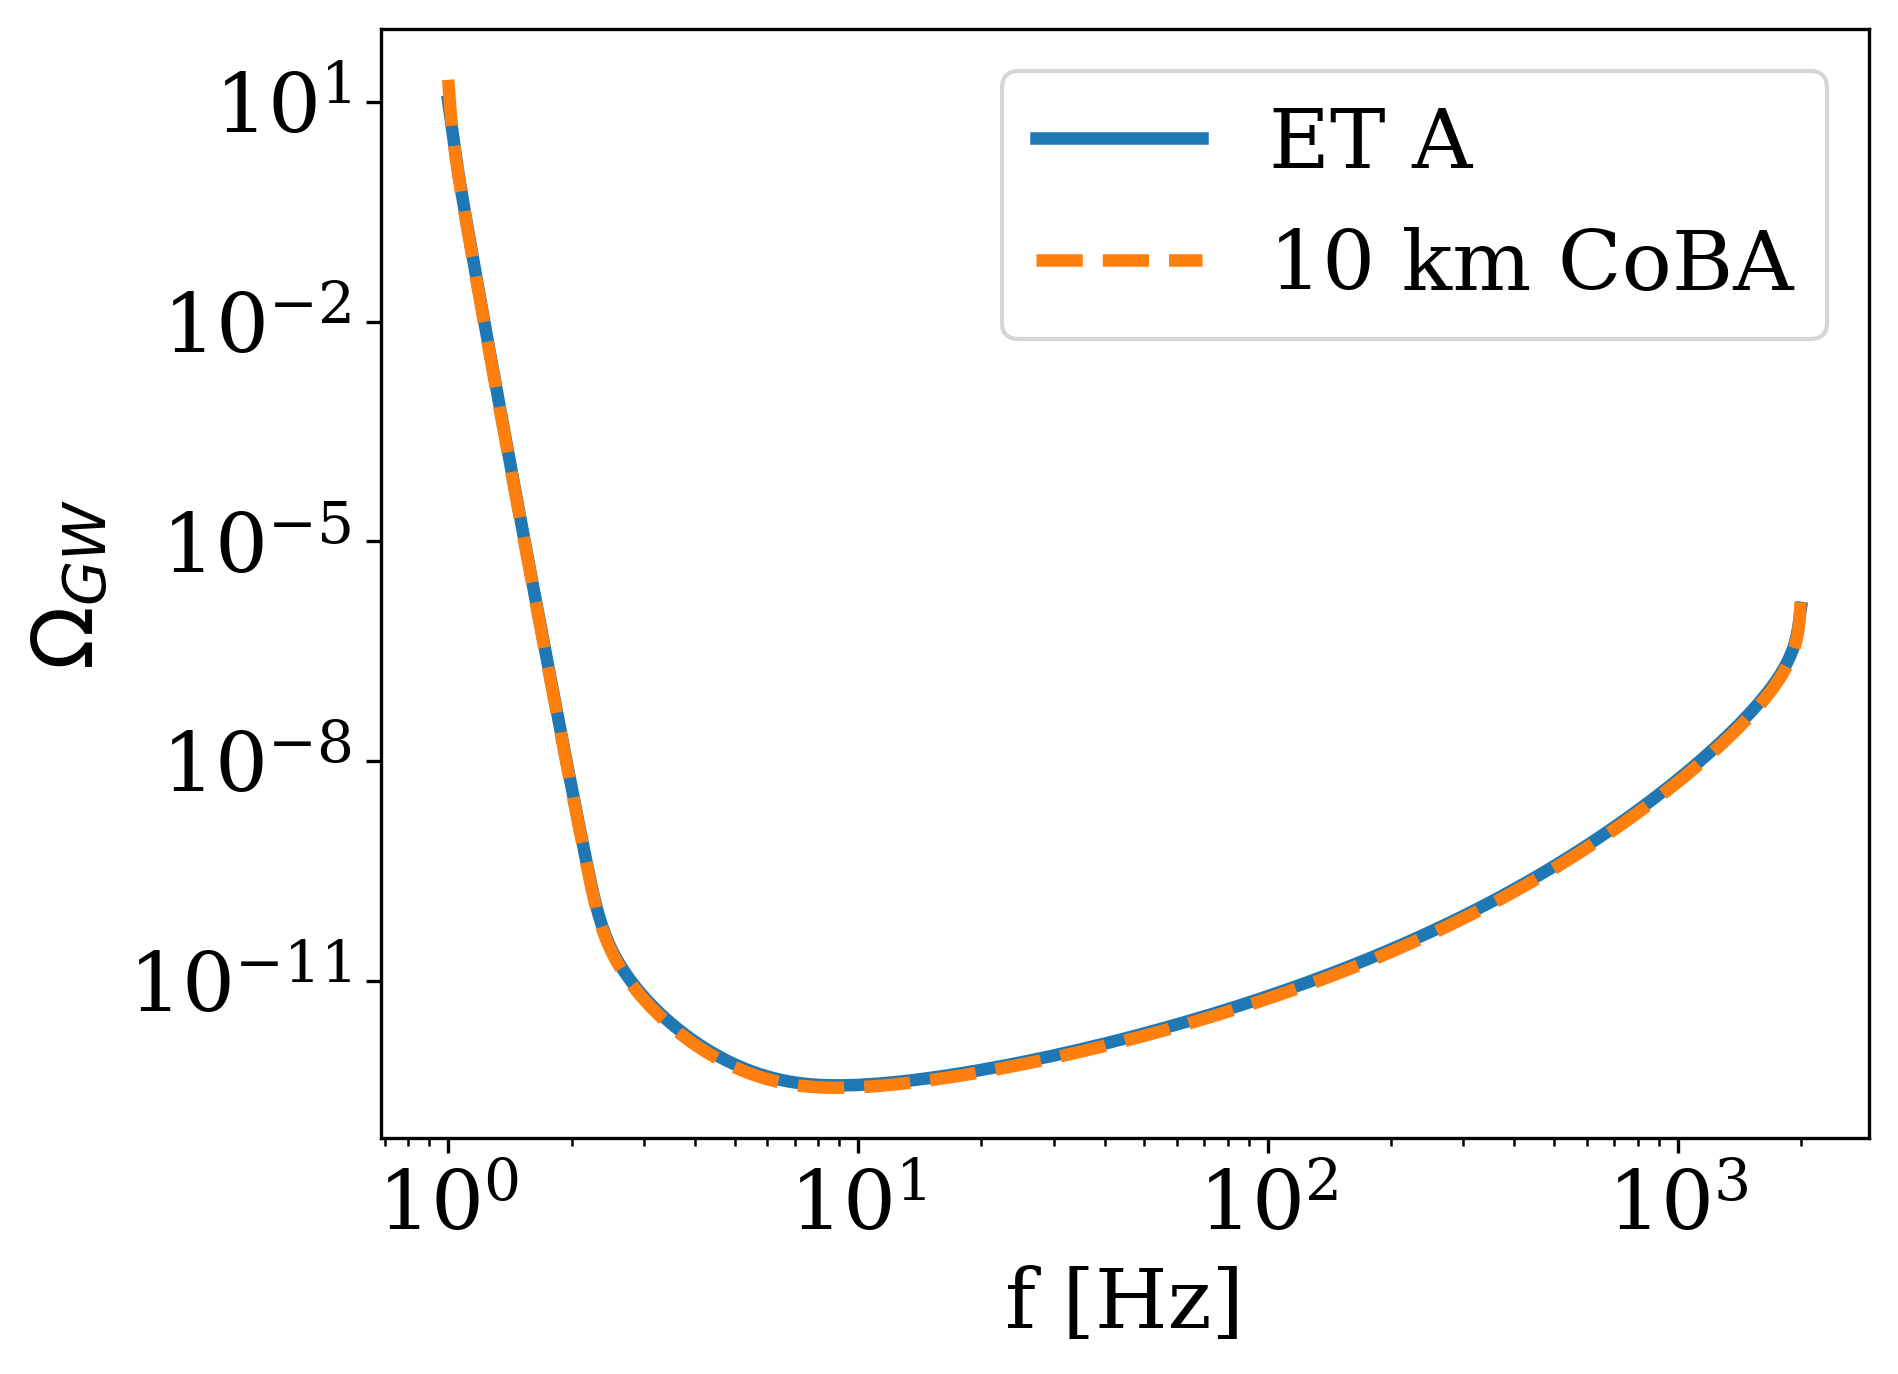

In [7]:
plt.plot(f, pls_ET_triang/np.sqrt(3), label='ET A')
plt.plot(f_pls_10km_coba, pls_10km_coba, label='10 km CoBA', linestyle='--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$\Omega_{GW}$')
plt.legend()

* ET 2L $\alpha = 0^{\circ}$

In [8]:
f = np.logspace(0, np.log10(2000), 1000)

fref = 100
snr = 1
Tobs = 1
beta_min = -40
beta_max = 40


pls_ET_2L = pls.PLS('ET L1', 'ET L2', f, fref, 't', snr, Tobs, beta_min, beta_max, np.deg2rad(0))

f_pls_15km_coba, pls_15km_coba = np.loadtxt('PLS_CoBA_store/h2_Omega_PLS_SNR_1_Tobs_1yr_2L0deg_15km_HFLFcryo.txt', unpack=True)



(1000, 1000)


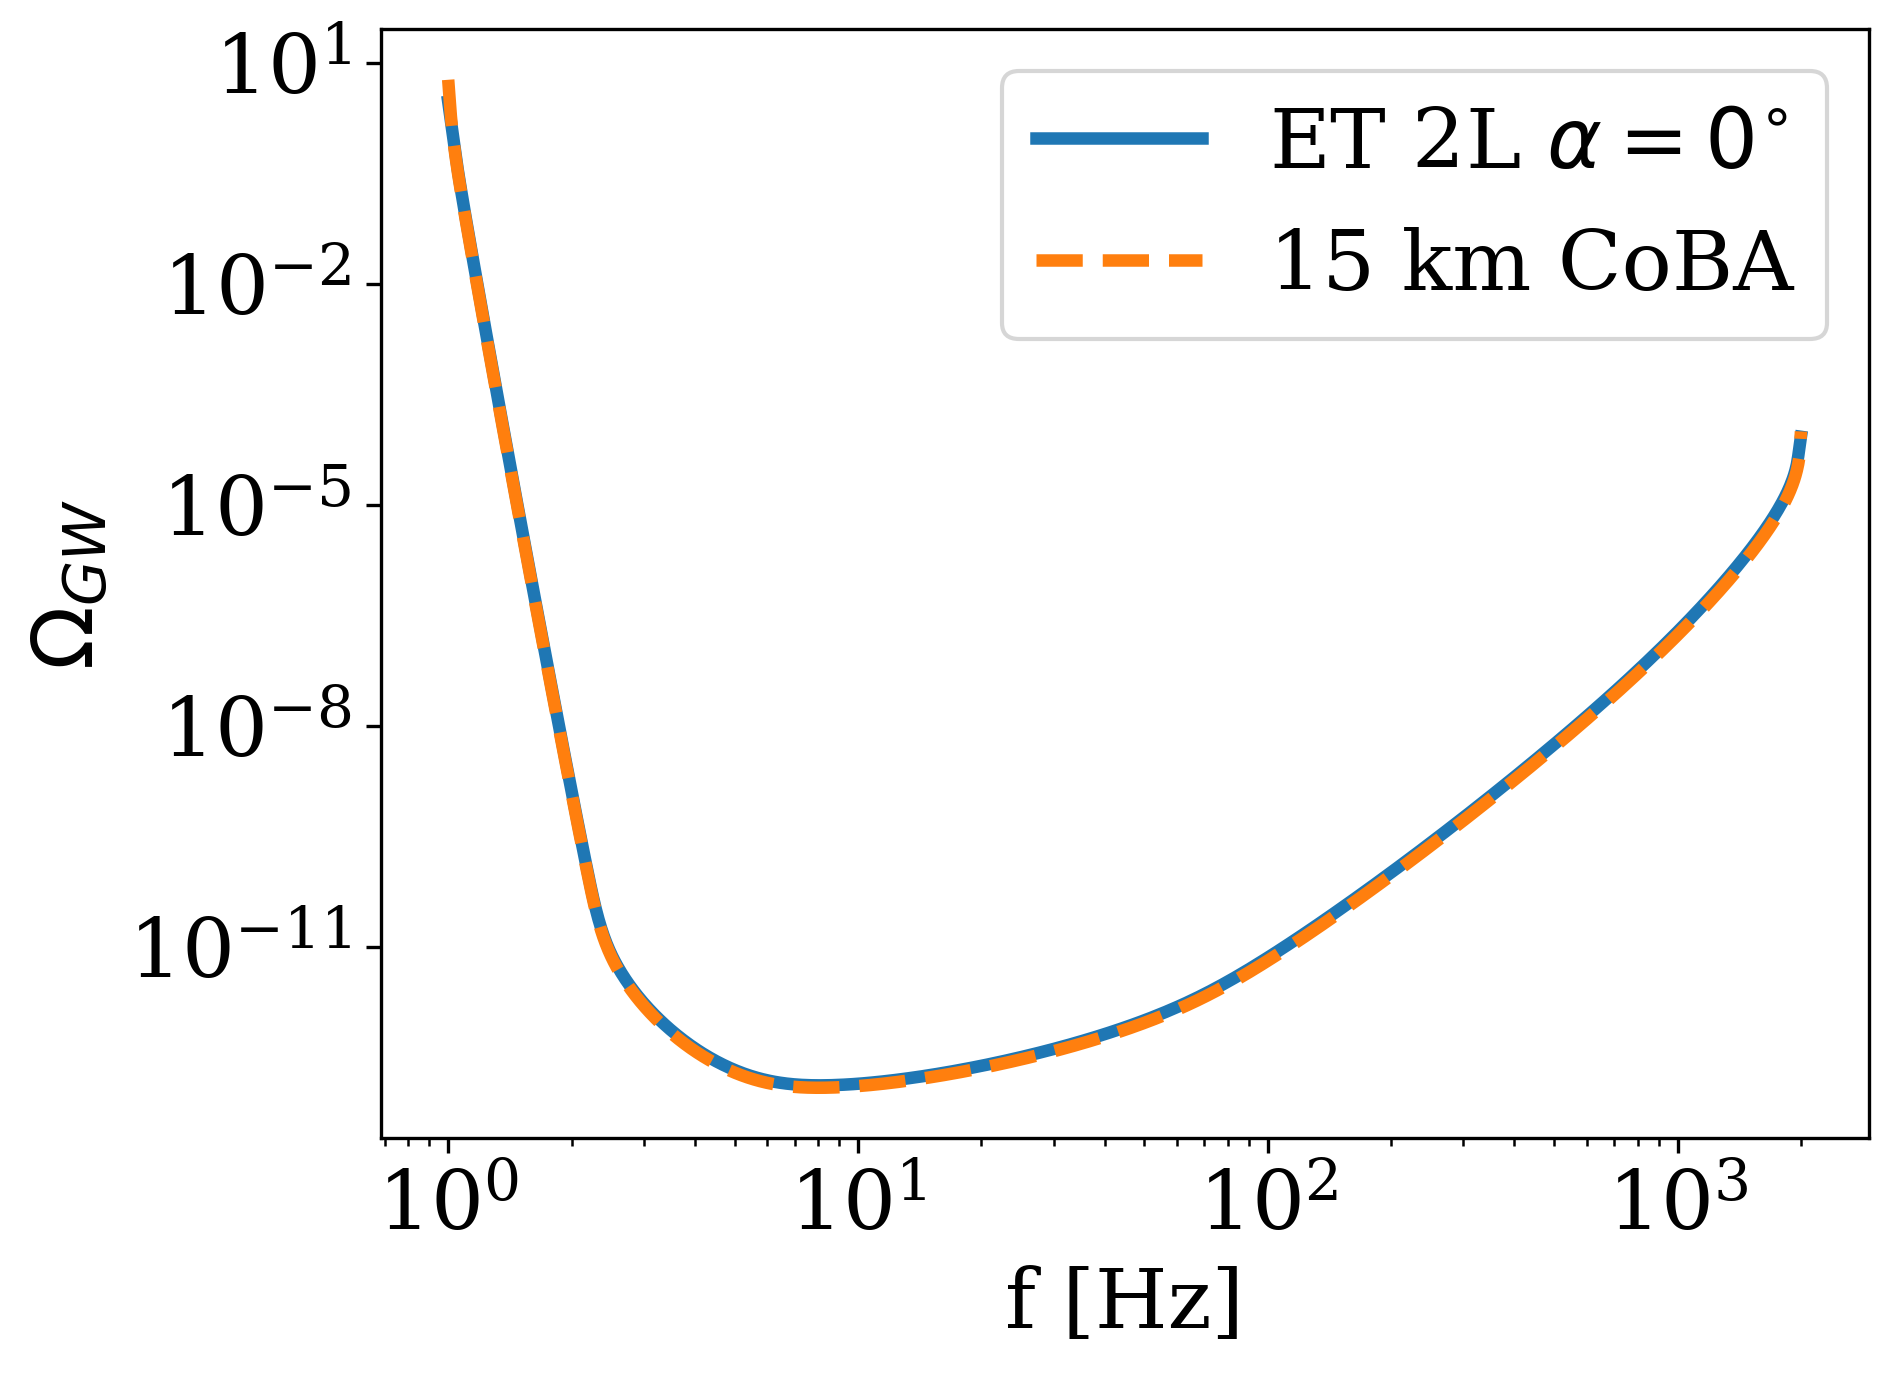

In [9]:
plt.plot(f, pls_ET_2L, label=r'ET 2L $\alpha =0^{\circ}$')
plt.plot(f_pls_15km_coba, pls_15km_coba, label='15 km CoBA', linestyle='--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$\Omega_{GW}$')
plt.legend()
    

* ET 2L $\alpha =42.5^{\circ}$

In [12]:
f = np.logspace(0, np.log10(2000), 1000)

fref = 100
snr = 1
Tobs = 1
beta_min = -40
beta_max = 40

pls_ET_2L_425 = pls.PLS('ET L1', 'ET L2', f, fref, 't', snr, Tobs, beta_min, beta_max, np.deg2rad(42.5))
pls_ET_2L_45 = pls.PLS('ET L1', 'ET L2', f, fref, 't', snr, Tobs, beta_min, beta_max, np.deg2rad(45))
f_pls_15km_coba, pls_15km_coba = np.loadtxt('PLS_CoBA_store/h2_Omega_PLS_SNR_1_Tobs_1yr_2L45deg_15km_HFLFcryo.txt', unpack=True)


(1000, 1000)
(1000, 1000)


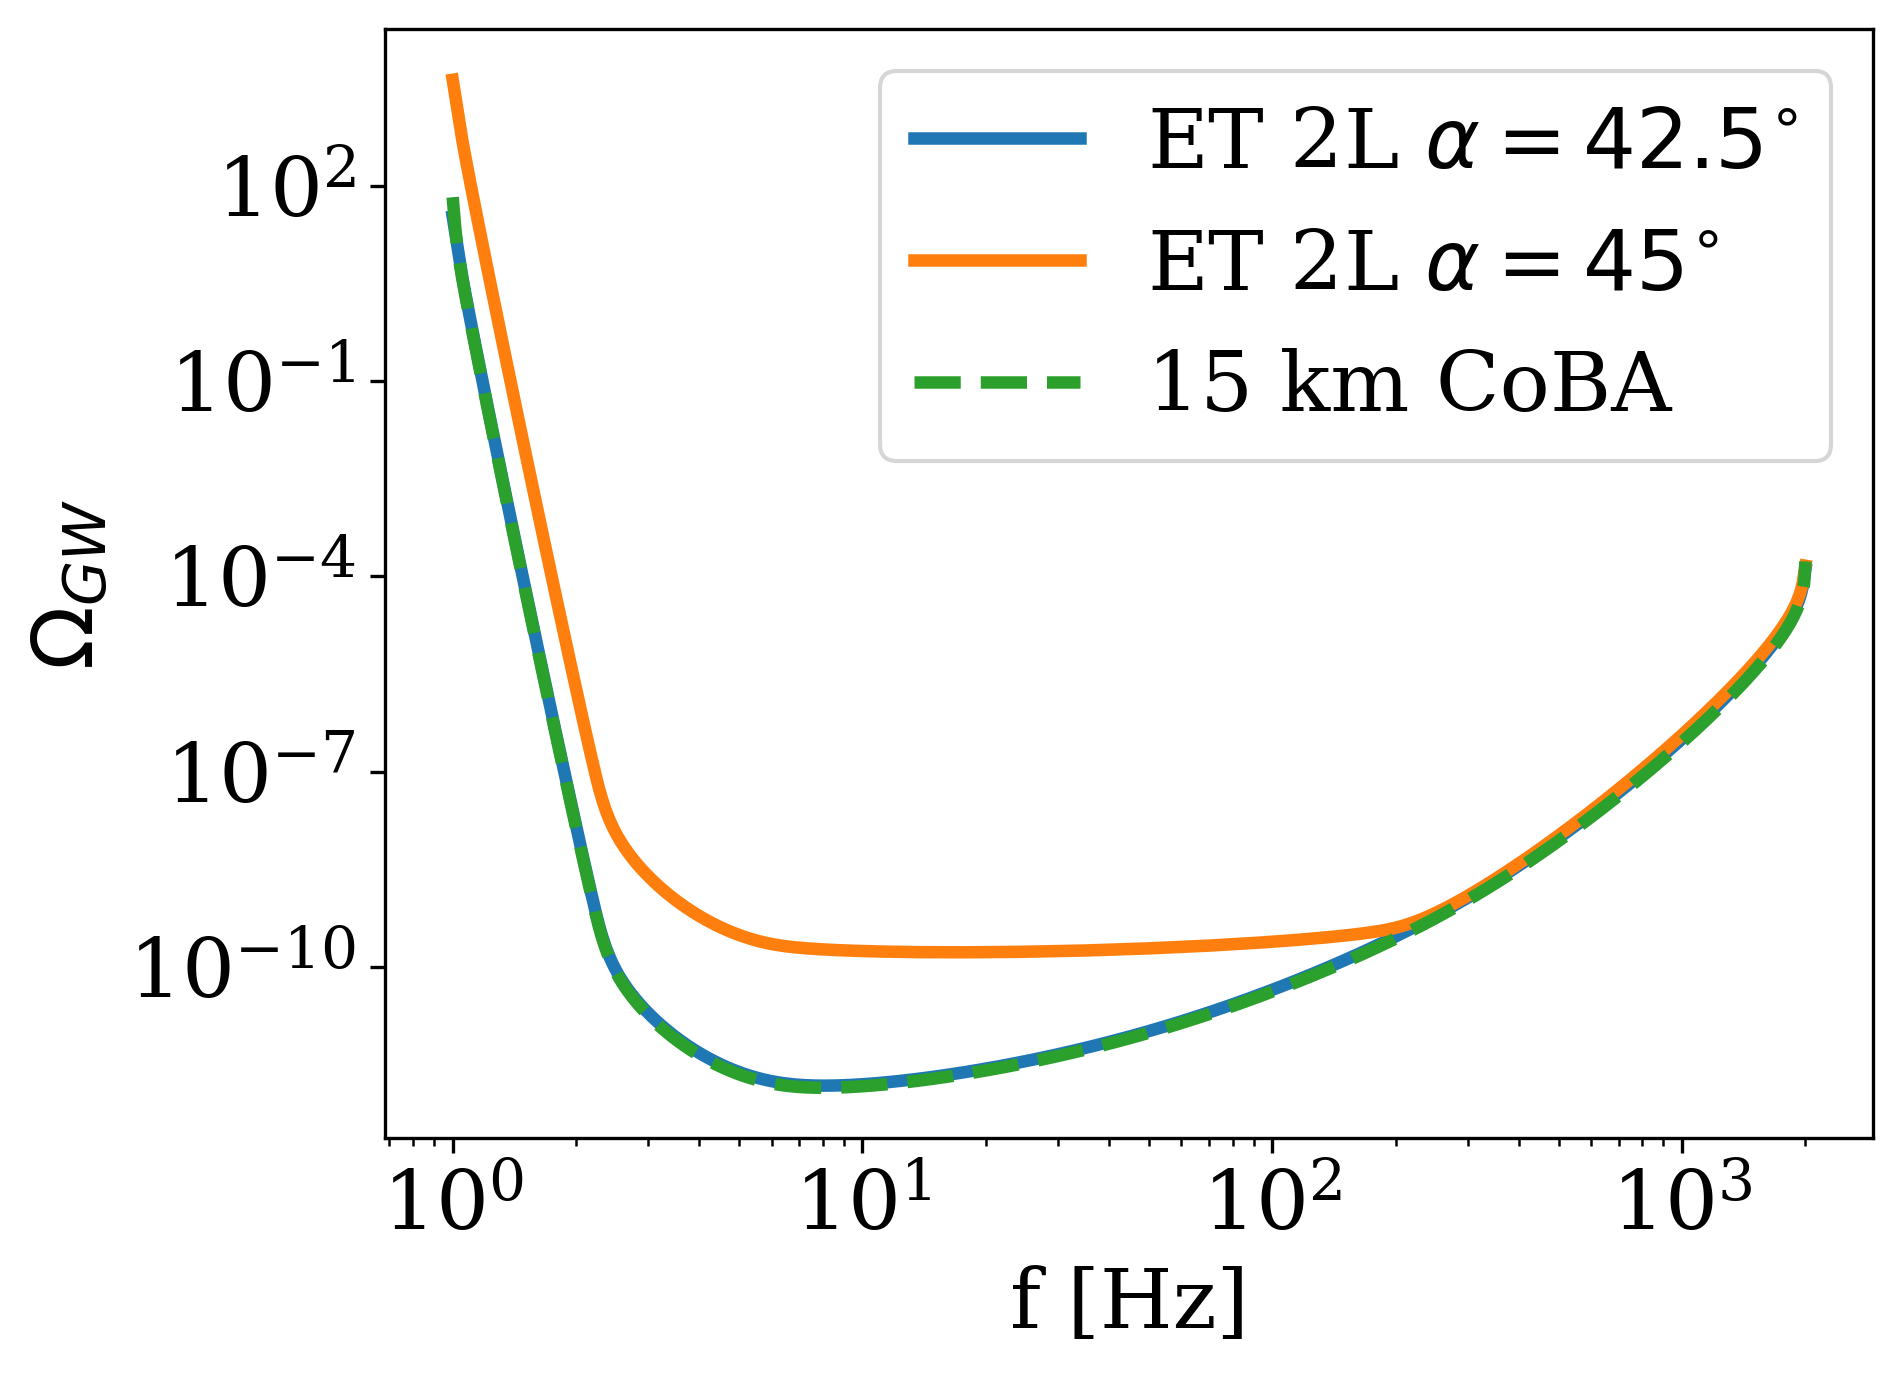

In [13]:
plt.plot(f, pls_ET_2L_425, label=r'ET 2L $\alpha =42.5^{\circ}$')
plt.plot(f, pls_ET_2L_45, label=r'ET 2L $\alpha =45^{\circ}$')
plt.plot(f_pls_15km_coba, pls_15km_coba, label='15 km CoBA', linestyle='--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$\Omega_{GW}$')
plt.legend()


* LISA

In [63]:
f = np.logspace(np.log10(3e-5), np.log10(5e-1), 1000)

fref = 1e-2
snr = 10
Tobs = 3
beta_min = -10
beta_max = 10

pls_LISA = pls.PLS('LISA 1', 'LISA 1', f, fref, 't', snr, Tobs, beta_min, beta_max, None)

f_pls, pls_check = np.loadtxt('LISA_sens.txt', unpack=True, usecols=(0, 3))

0.2999368069635976
-0.14996840348179882
1.124763026113491
(1000, 1000)


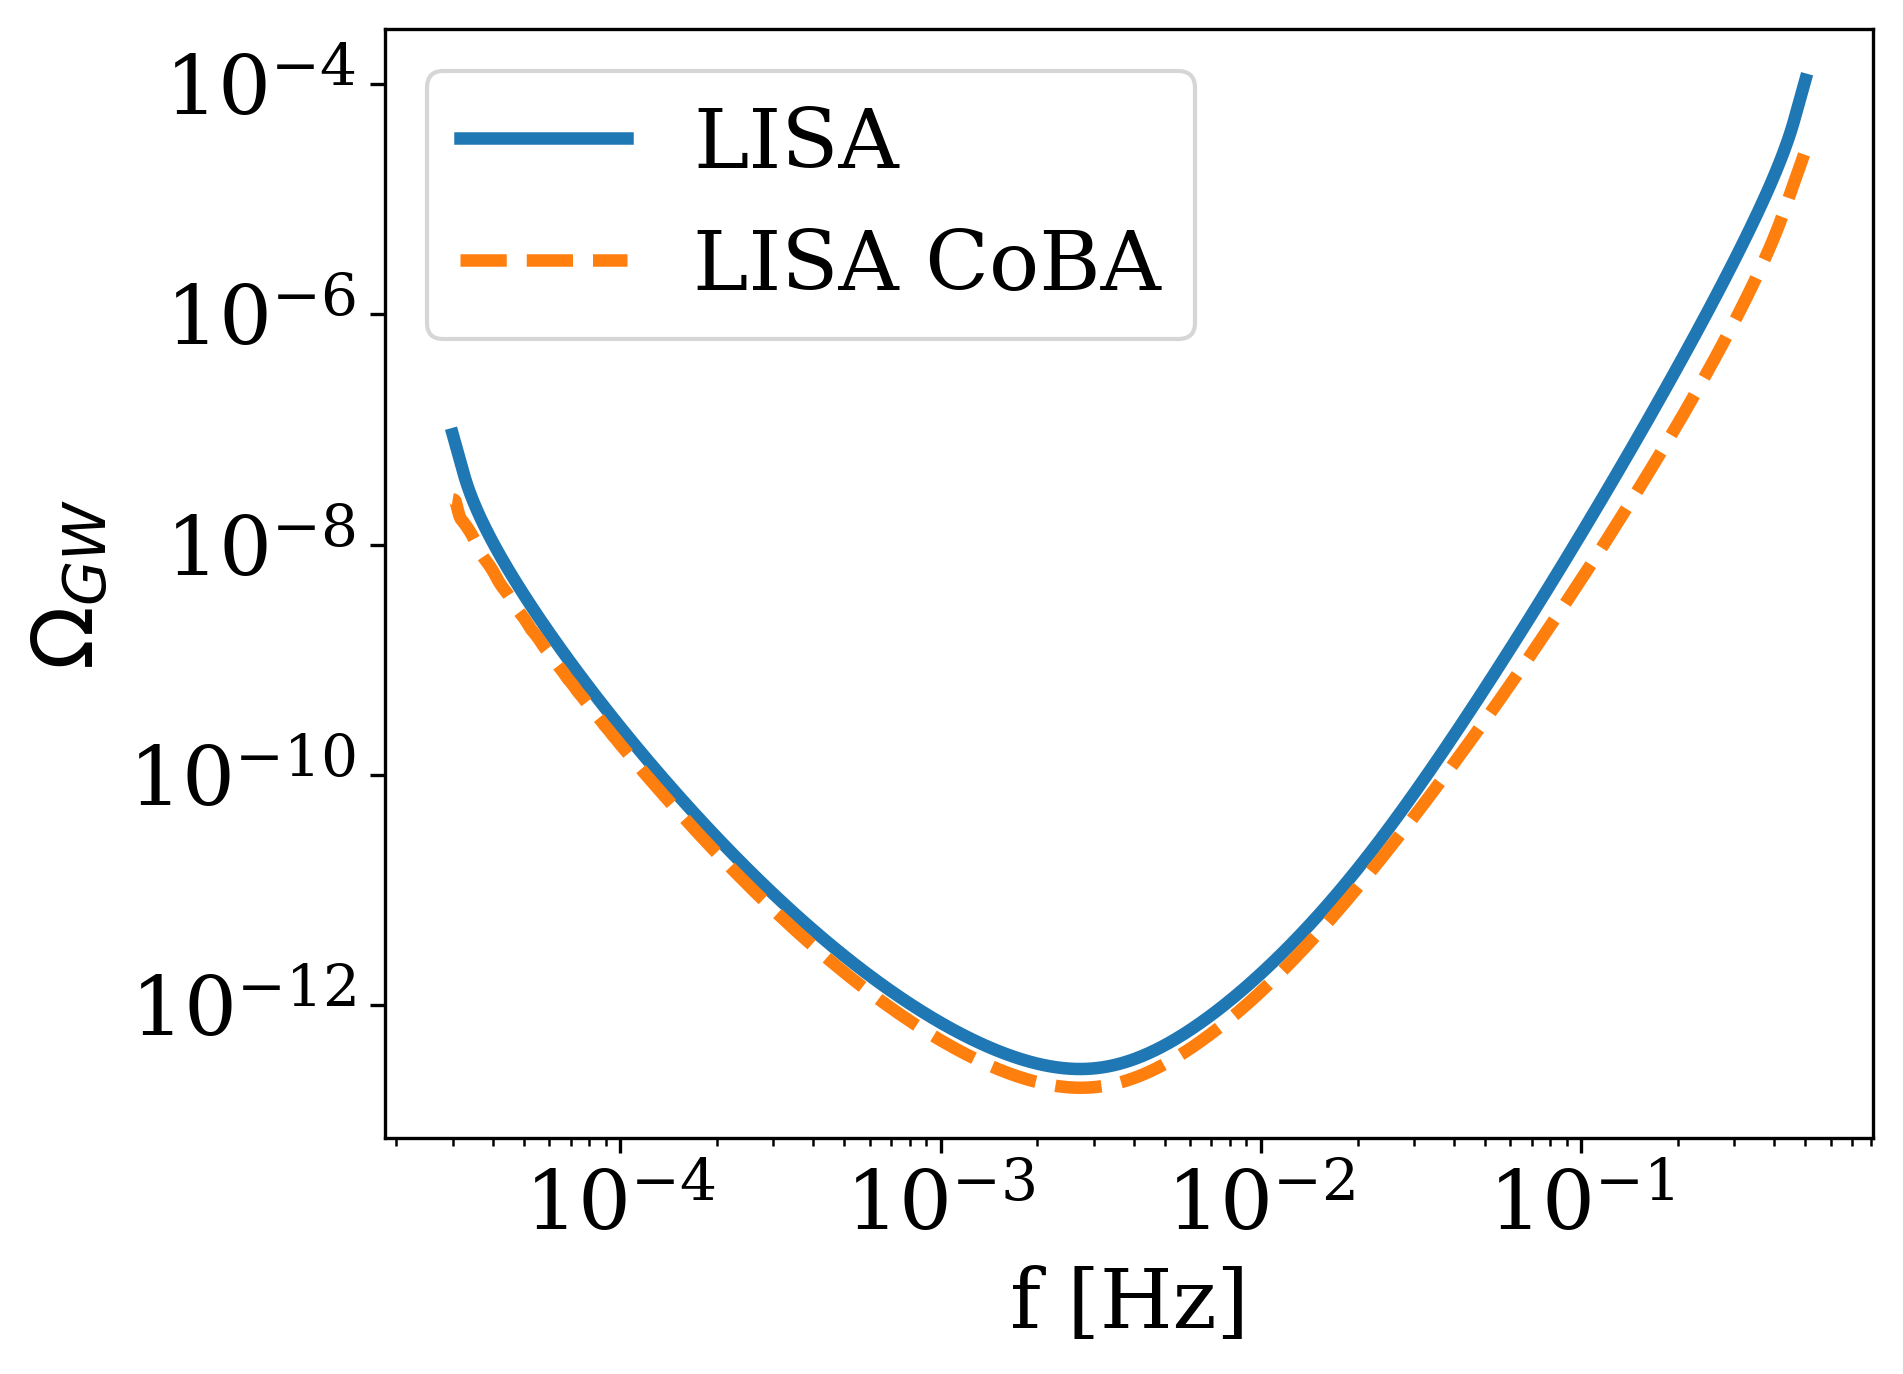

In [60]:
plt.plot(f, pls_LISA, label='LISA')
plt.plot(f_pls, pls_check, label='LISA CoBA', linestyle='--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('f [Hz]')
plt.ylabel(r'$\Omega_{GW}$')
plt.legend()

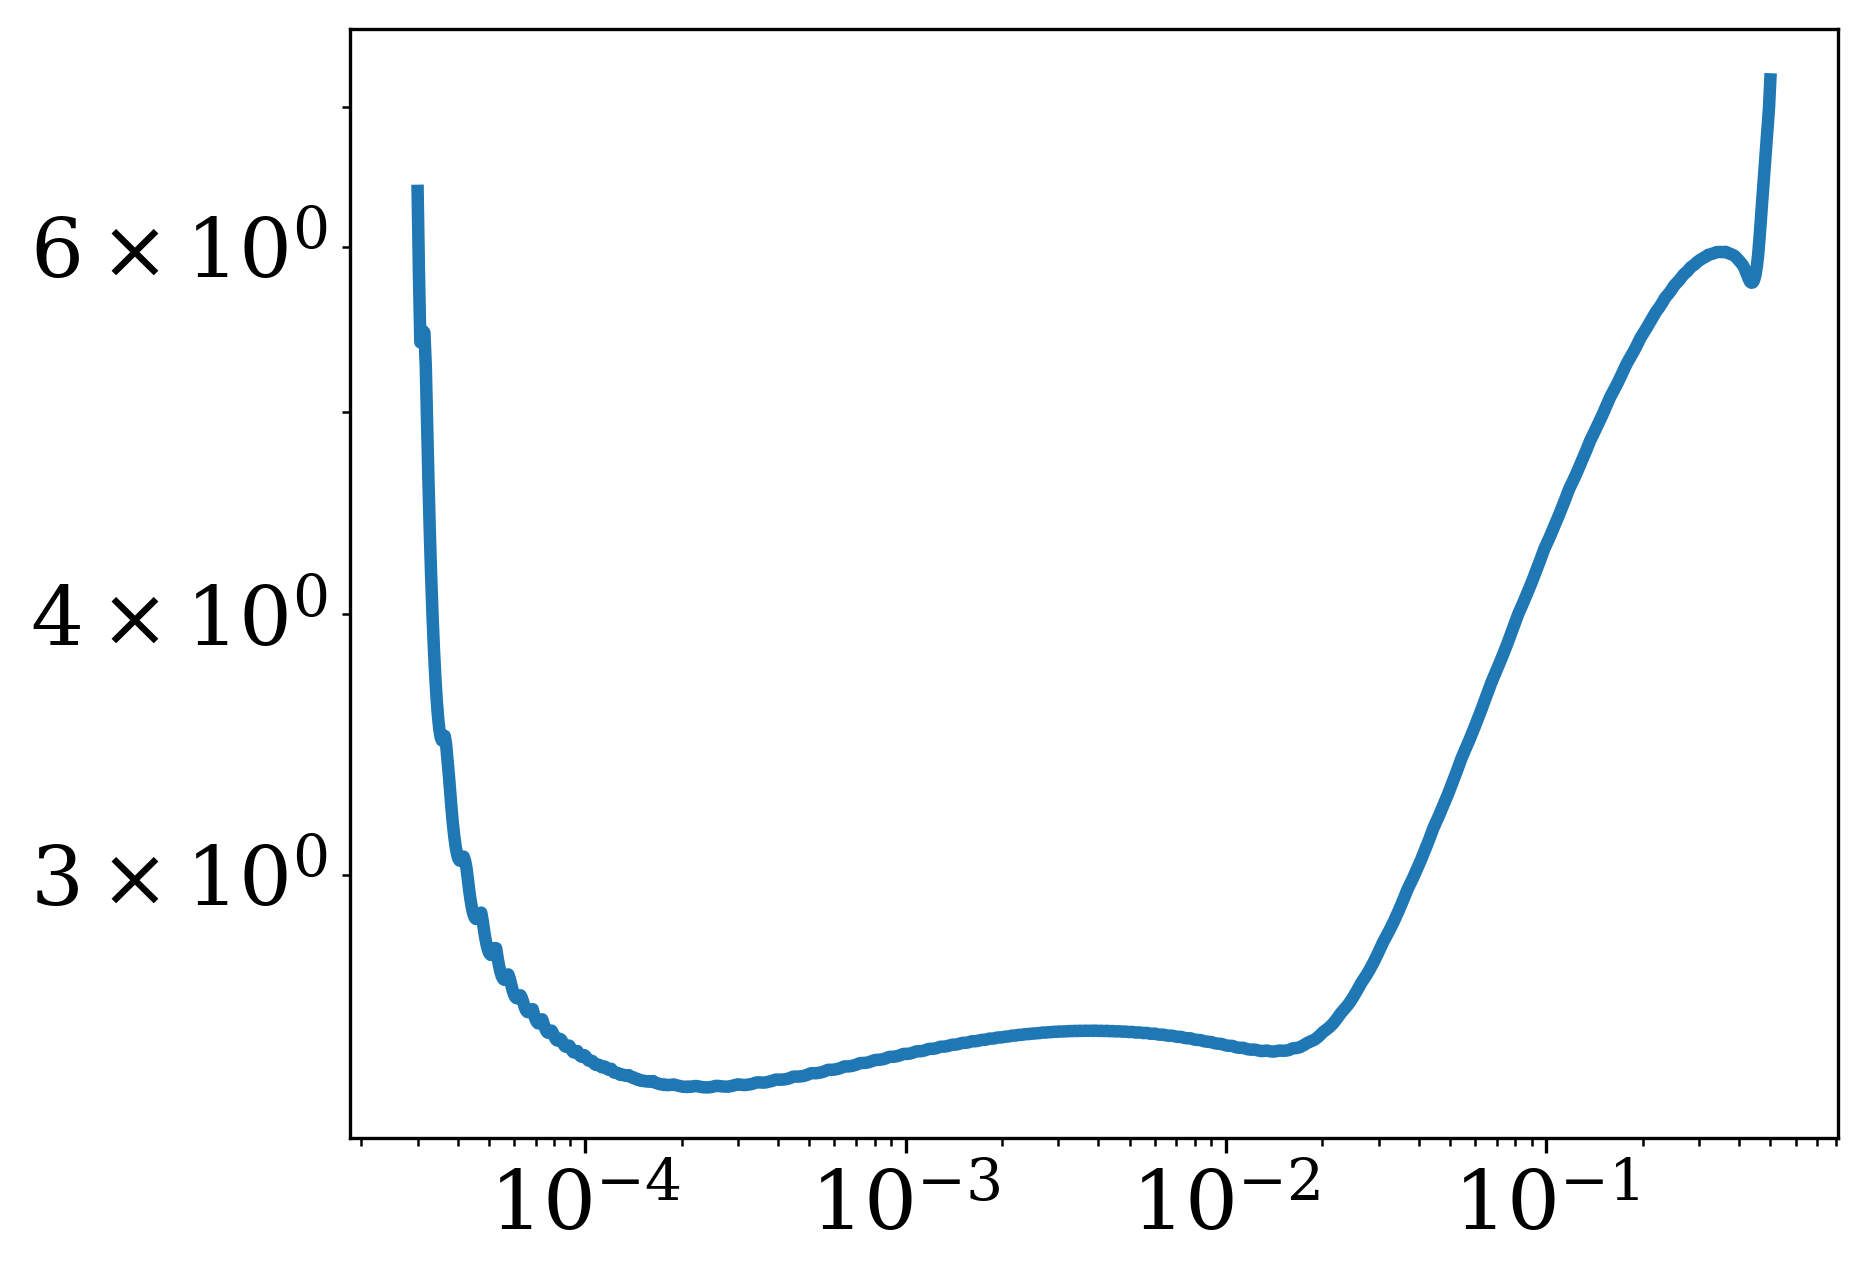

In [62]:
pls_check_interp = np.interp(f, f_pls, pls_check)

plt.loglog(f, pls_LISA/pls_check_interp, label='LISA')